<a href="https://colab.research.google.com/github/karthikeya-2005/Machine-Learning-lab/blob/main/Lab4_KNN(AP23110011400).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2 -O groceries.csv

import pandas as pd

df = pd.read_csv("groceries.csv")   # replace with the exact filename if different
print(df.head())    # first 5 rows
print(df.shape)     # rows, columns

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/groceries.csv
100% 14.6k/14.6k [00:00<00:00, 39.8MB/s]
   Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  class
0       3  12669  9656     7561     214              2674        1338      2
1       3   7057  9810     9568    1762              3293        1776      2
2       3   6353  8808     7684    2405              3516        7844      2
3       3  13265  1196     4221    6404               507        1788      1
4       3  22615  5410     7198    3915              1777        5185      1
(440, 8)


Step-1
Basic Pre Processing


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("groceries.csv")

# Check missing values
print("Missing values:\n", df.isnull().sum(), "\n")

print("Missing values before imputation:\n", df.isna().sum())

# Impute NaN values
# Numeric features → fill with mean
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].apply(lambda col: col.fillna(col.mean()))

# Categorical features → fill with mode
cat_cols = df.select_dtypes(exclude=[np.number]).columns
df[cat_cols] = df[cat_cols].apply(lambda col: col.fillna(col.mode()[0]))

print("Missing values after imputation:\n", df.isna().sum())

# Separate features and target
X = df.drop("class", axis=1)
y = df["class"]

# Check class distribution (imbalance check)
print("Class distribution:\n", y.value_counts(normalize=True), "\n")

# Feature scaling (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Convert scaled arrays back to DataFrame (for display/saving)
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

print("Sample preprocessed training data:\n", X_train_df.head(), "\n")
print("y_train sample:\n", y_train.head(), "\n")

# Save processed data (optional)
train_processed = X_train_df.copy()
train_processed["class"] = y_train.values
test_processed = X_test_df.copy()
test_processed["class"] = y_test.values

train_processed.to_csv("groceries_train_processed.csv", index=False)
test_processed.to_csv("groceries_test_processed.csv", index=False)



Missing values:
 Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
class               0
dtype: int64 

Missing values before imputation:
 Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
class               0
dtype: int64
Missing values after imputation:
 Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
class               0
dtype: int64
Class distribution:
 class
2    0.409091
3    0.393182
1    0.197727
Name: proportion, dtype: float64 

Sample preprocessed training data:
      Region     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
0  0.590668 -0.942242 -0.297242  0.468664 -0.613289          0.018584   
1  0.590668 -0.625531  3.268554  1.992626 -0.094023        

Step-2 Scratch implementaion of KNN

In [ ]:
import numpy as np
from collections import Counter

# Euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# KNN from scratch
class KNN_Scratch:
    def __init__(self, k=17):
        self.k = k

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        return np.array([self._predict(x) for x in X])

    def _predict(self, x):
        # Compute distances to all training samples
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Get indices of k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Majority vote
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Train & Test Scratch KNN
knn_scratch = KNN_Scratch(k=17)
knn_scratch.fit(X_train, y_train)
y_pred_scratch = knn_scratch.predict(X_test)

# Accuracy
scratch_acc = np.mean(y_pred_scratch == y_test)
print("Scratch KNN Accuracy:", scratch_acc)


Scratch KNN Accuracy: 0.9659090909090909


Optimal K

Best k = 17 with Accuracy = 0.9773


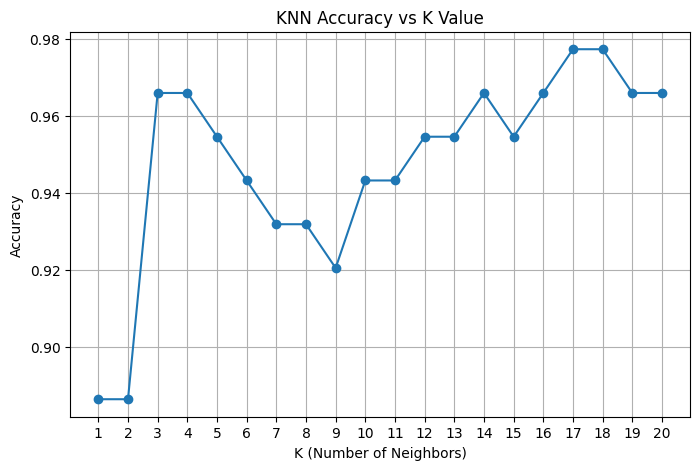

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Range of k values to test
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Find best k
best_k = k_values[accuracies.index(max(accuracies))]
best_acc = max(accuracies)

print(f"Best k = {best_k} with Accuracy = {best_acc:.4f}")

# Plot accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title("KNN Accuracy vs K Value")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()


Step-3 KNN - SKlearn version


Best k = 17 with Accuracy = 0.9773


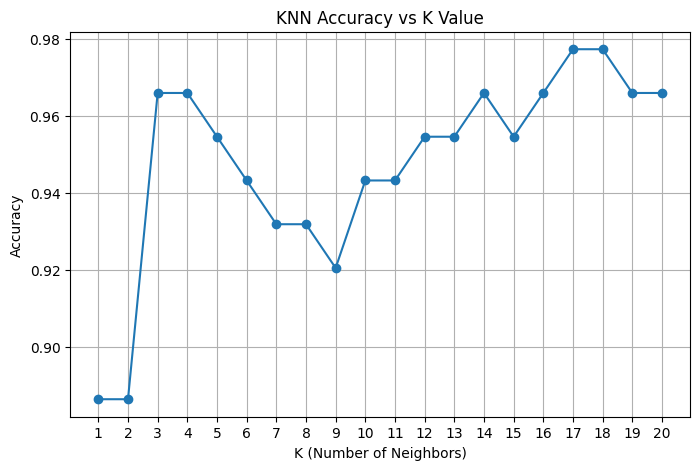

Final Accuracy: 0.9772727272727273

Confusion Matrix:
 [[16  0  1]
 [ 1 35  0]
 [ 0  0 35]]

Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.94      0.94        17
           2       1.00      0.97      0.99        36
           3       0.97      1.00      0.99        35

    accuracy                           0.98        88
   macro avg       0.97      0.97      0.97        88
weighted avg       0.98      0.98      0.98        88



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

best_k = k_values[accuracies.index(max(accuracies))]
best_acc = max(accuracies)
print(f"Best k = {best_k} with Accuracy = {best_acc:.4f}")

# Plot accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title("KNN Accuracy vs K Value")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Final Model with best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

# Evaluation
print("Final Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

